In [2]:
import pandas as pd


train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [3]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
train_data['split_label'] = 'train' 

test_data['split_label'] = 'test'

In [6]:
data = pd.concat([train_data,test_data], axis = 0)
data.shape

(1852394, 24)

In [7]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'split_label'],
      dtype='object')

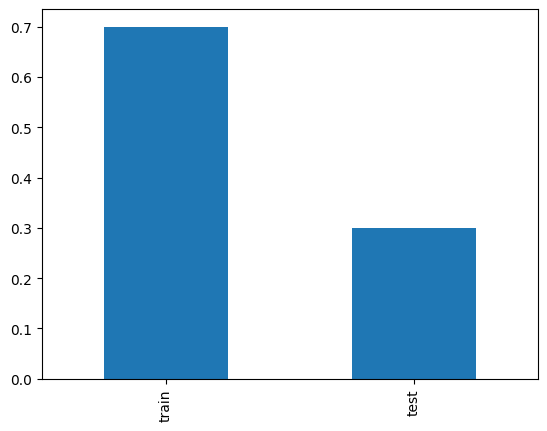

In [8]:
data['split_label'].value_counts(normalize = True).plot(kind = 'bar');

In [8]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split_label              0
dtype: int64

In [9]:
100*data.is_fraud.value_counts(normalize=True)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

### Data cleaning

In [10]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time']) # converting transaction date time
data['trans_date_trans_time'].head(3)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
Name: trans_date_trans_time, dtype: datetime64[ns]

In [11]:
data['dob'] = pd.to_datetime(data['dob']) # converting DOB to datetime
data['dob'].head(3)

0   1988-03-09
1   1978-06-21
2   1962-01-19
Name: dob, dtype: datetime64[ns]

In [12]:
cat_cols = data.select_dtypes(include = 'object').columns
cat_cols

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num', 'split_label'],
      dtype='object')

In [13]:
for col in cat_cols:

    data[col] = data[col].str.lower().str.strip() # cleaning the categorical columns with strings methods

data[cat_cols].nunique().sort_values()

gender               2
split_label          2
category            14
state               51
first              355
last               486
job                497
merchant           693
city               906
street             999
trans_num      1852394
dtype: int64

We are cleaning categorical columns in a DataFrame by converting the values to lowercase and removing leading/trailing whitespaces using the str.lower() and str.strip() string methods, respectively. After that, we are counting the number of unique values in each categorical column using the .nunique() method, and finally sorting the results in ascending order using .sort_values().

In [13]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split_label
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


In [14]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'split_label'],
      dtype='object')

In [15]:
drop_cols = ['Unnamed: 0','street','merchant','zip','first','last','trans_num','job']
data.drop(drop_cols, axis =1, inplace = True)
list(data.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'split_label']

In [16]:
data['trans_hour'] = data['trans_date_trans_time'].dt.hour   # extracting the hour component using the dt accessor
data['trans_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [17]:
data['trans_year_month'] = data['trans_date_trans_time'].dt.to_period('M')# extracting the month number component using the dt accessor

data['trans_year_month'].unique()

<PeriodArray>
['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
 '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
 '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
 '2020-10', '2020-11', '2020-12']
Length: 24, dtype: period[M]

In [18]:
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_name() # extracting the day name component using the dt accessor

data['trans_dayofweek'].unique() 

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [19]:
data.nunique()

trans_date_trans_time    1819551
cc_num                       999
category                      14
amt                        60616
gender                         2
city                         906
state                         51
lat                          983
long                         983
city_pop                     891
dob                          984
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
split_label                    2
trans_hour                    24
trans_year_month              24
trans_dayofweek                7
dtype: int64

1. There are 999 credt cards transaction recorded
2. Each credict card has been utilised mutiple times (average of 1854 times)

In [20]:
import numpy as np
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = np.round((data['trans_date_trans_time'] - 
                      data['dob'])/np.timedelta64(1, 'Y'))
data.age.head()

0    31.0
1    41.0
2    57.0
3    52.0
4    33.0
Name: age, dtype: float64

In [ ]:
## information about trans_date_trans_time, date of birth is already exracted.

In [21]:
data.drop(['trans_date_trans_time', 'dob'] , axis=1, inplace=True)
data.head()

,cc_num,category,amt,gender,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,split_label,trans_hour,trans_year_month,trans_dayofweek,age
0,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,train,0,2019-01,Tuesday,31.0
1,630423337322,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,train,0,2019-01,Tuesday,41.0
2,38859492057661,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,train,0,2019-01,Tuesday,57.0
3,3534093764340240,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,train,0,2019-01,Tuesday,52.0
4,375534208663984,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,train,0,2019-01,Tuesday,33.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column            Dtype    
---  ------            -----    
 0   cc_num            int64    
 1   category          object   
 2   amt               float64  
 3   gender            object   
 4   city              object   
 5   state             object   
 6   lat               float64  
 7   long              float64  
 8   city_pop          int64    
 9   unix_time         int64    
 10  merch_lat         float64  
 11  merch_long        float64  
 12  is_fraud          int64    
 13  split_label       object   
 14  trans_hour        int64    
 15  trans_year_month  period[M]
 16  trans_dayofweek   object   
 17  age               float64  
dtypes: float64(6), int64(5), object(6), period[M](1)
memory usage: 268.5+ MB


In [23]:
df_copy = data.copy()

In [24]:
# Calculate overall 'amt' distribution statistics
overall_stats = data['amt'].describe(percentiles=[0.5, 0.95, 0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt': 'Overall Amt Distribution'})

non_fraud_stats = data.loc[data['is_fraud'] == 0, ['amt']].describe(percentiles=[0.5, 0.95, 0.999]).reset_index(drop=1).rename(columns={'amt': 'Non-Fraud Amt Distribution'})

fraud_stats = data.loc[data['is_fraud'] == 1, ['amt']].describe(percentiles=[0.5, 0.95, 0.999]).reset_index(drop=1).rename(columns={'amt': 'Fraud Amt Distribution'})

result = pd.concat([overall_stats, non_fraud_stats, fraud_stats], axis=1)


In [25]:
result

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


In [26]:
data['class'] = data['is_fraud'].map({1:'Fraud',0:'Non_Fraud'})
data

,cc_num,category,amt,gender,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,split_label,trans_hour,trans_year_month,trans_dayofweek,age,class
0,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,train,0,2019-01,Tuesday,31.0,Non_Fraud
1,630423337322,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,train,0,2019-01,Tuesday,41.0,Non_Fraud
2,38859492057661,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,train,0,2019-01,Tuesday,57.0,Non_Fraud
3,3534093764340240,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,train,0,2019-01,Tuesday,52.0,Non_Fraud
4,375534208663984,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,train,0,2019-01,Tuesday,33.0,Non_Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,test,23,2020-12,Thursday,55.0,Non_Fraud
555715,3556613125071656,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,test,23,2020-12,Thursday,21.0,Non_Fraud
555716,6011724471098086,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,test,23,2020-12,Thursday,39.0,Non_Fraud
555717,4079773899158,travel,7.99,M,Mesa,ID,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,test,23,2020-12,Thursday,55.0,Non_Fraud


In [27]:
not_fraud = data[data['is_fraud'] == 0]
not_fraud

,cc_num,category,amt,gender,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,split_label,trans_hour,trans_year_month,trans_dayofweek,age,class
0,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,train,0,2019-01,Tuesday,31.0,Non_Fraud
1,630423337322,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,train,0,2019-01,Tuesday,41.0,Non_Fraud
2,38859492057661,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,train,0,2019-01,Tuesday,57.0,Non_Fraud
3,3534093764340240,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,train,0,2019-01,Tuesday,52.0,Non_Fraud
4,375534208663984,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,train,0,2019-01,Tuesday,33.0,Non_Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,test,23,2020-12,Thursday,55.0,Non_Fraud
555715,3556613125071656,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,test,23,2020-12,Thursday,21.0,Non_Fraud
555716,6011724471098086,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,test,23,2020-12,Thursday,39.0,Non_Fraud
555717,4079773899158,travel,7.99,M,Mesa,ID,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,test,23,2020-12,Thursday,55.0,Non_Fraud


In [28]:
fraud = data[data['is_fraud'] == 1]
fraud.head()

,cc_num,category,amt,gender,city,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,split_label,trans_hour,trans_year_month,trans_dayofweek,age,class
2449,4613314721966,grocery_pos,281.06,M,Collettsville,NC,35.9946,-81.7266,885,1325466397,36.430124,-81.179483,1,train,1,2019-01,Wednesday,30.0,Fraud
2472,340187018810220,gas_transport,11.52,F,San Antonio,TX,29.4400,-98.4590,1595797,1325468849,29.819364,-99.142791,1,train,1,2019-01,Wednesday,58.0,Fraud
2523,340187018810220,grocery_pos,276.31,F,San Antonio,TX,29.4400,-98.4590,1595797,1325473523,29.273085,-98.836360,1,train,3,2019-01,Wednesday,58.0,Fraud
2546,4613314721966,gas_transport,7.03,M,Collettsville,NC,35.9946,-81.7266,885,1325475483,35.909292,-82.091010,1,train,3,2019-01,Wednesday,30.0,Fraud
2553,340187018810220,grocery_pos,275.73,F,San Antonio,TX,29.4400,-98.4590,1595797,1325476547,29.786426,-98.683410,1,train,3,2019-01,Wednesday,58.0,Fraud


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data.amt, ax=axes[0, 0])
axes[0, 0].set_title('Amt Distribution')

# Plotting the distribution of 'amt' feature for overall transactions
sns.histplot(data[data.amt <= 1500].amt, bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Overall Amt Distribution')
axes[0, 1].set_xlabel('Transaction Amount')
axes[0, 1].set_ylabel('Number of transactions')

# Plotting the distribution of 'amt' feature for non-fraud transactions
# sns.histplot(not_fraud[(not_fraud.is_fraud == 0) & (not_fraud.amt <= 1500)].amt, bins=50, ax=axes[1, 0])
# axes[1, 0].set_title('Non-Fraud Amt Distribution')
# axes[1, 0].set_xlabel('Transaction Amount')
# axes[1, 0].set_ylabel('Number of transactions')

# # Plotting the distribution of 'amt' feature for fraud transactions
# sns.histplot(fraud[(fraud.is_fraud == 1) & (fraud.amt <= 1500)].amt, bins=50, ax=axes[1, 1])
# axes[1, 1].set_title('Fraud Amt Distribution')
# axes[1, 1].set_xlabel('Transaction Amount')
# axes[1, 1].set_ylabel('Number of transactions')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


NameError: ignored

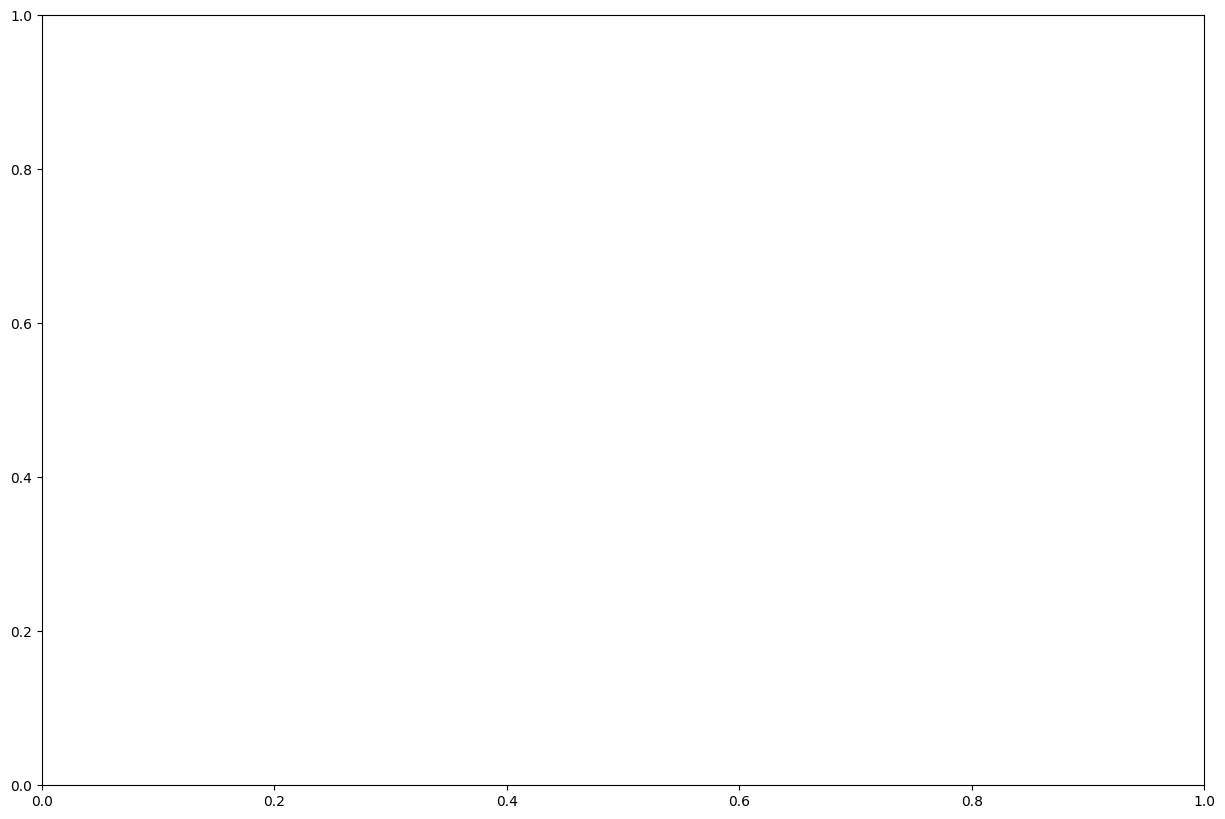

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature
#box plot
plots.append(sns.boxplot(data.amt, ax=plt.subplot(211)))

#distribution plots
plots.append(sns.histplot(data[data.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(data[(data.is_fraud==0) & (data.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(data[(data.is_fraud==1) & (data.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')

#setting x labels
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')

#setting y label
plots[1].set_ylabel('Number of transactions')

plt.show()